## Демидова Екатерина

## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия? 

In [1]:
!mkdir data
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip -P data
!unzip -o data/lenta.txt.zip -d data/

--2025-09-16 13:52:58--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip [following]
--2025-09-16 13:52:59--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5723675 (5.5M) [application/zip]
Saving to: 'data/lenta.txt.zip'

lenta.txt.zip       100%[===================>]   5.46M  15.1MB/s    in 0.4s    

2025-09-16 13:53:00 (15.1 MB/s) - 'data/lenta.txt.zip' sa

In [2]:
corpus = open('data/lenta.txt').read()

In [4]:
import nltk
nltk.download('punkt_tab')
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ekaterinademidova/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
sentences = sent_tokenize(corpus, language='russian')

In [6]:
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

In [7]:
import re
tokenized_sentences = [[token.lower() for token in sentence if not re.match('\W+', token)] 
                       for sentence in tokenized_sentences]

In [14]:
def ngrammer(tokens, n=5):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

In [39]:
from collections import Counter
pentagram_counts = Counter()
for sentence in tokenized_sentences:
    pentagram_counts.update(ngrammer([token for token in sentence]))

In [40]:
# ПЕРВЫЙ СПОСОБ
pentagram_counts.most_common(20)

[('риа новости со ссылкой на', 400),
 ('сообщает риа новости со ссылкой', 320),
 ('как сообщили риа новости в', 196),
 ('как сообщает риа новости со', 149),
 ('сообщает интерфакс со ссылкой на', 142),
 ('сообщает итар-тасс со ссылкой на', 118),
 ('об этом риа новости сообщили', 113),
 ('об этом сообщает риа новости', 104),
 ('этом риа новости сообщили в', 99),
 ('со ссылкой на источники в', 93),
 ('сообщили риа новости в пресс-службе', 88),
 ('группировки войск на северном кавказе', 84),
 ('как сообщает интерфакс со ссылкой', 83),
 ('объединенной группировки войск на северном', 83),
 ('новости со ссылкой на пресс-службу', 76),
 ('эхо москвы со ссылкой на', 76),
 ('этом сообщает риа новости со', 75),
 ('в связи с тем что', 70),
 ('по борьбе с организованной преступностью', 66),
 ('как сообщает итар-тасс со ссылкой', 58)]

In [23]:
tokens = word_tokenize(corpus, language='russian', preserve_line=True)

In [26]:
tokens = [token.lower() for token in tokens if not re.match('\W+', token)] 

In [29]:
pentagram_counts_2 = Counter()
pentagram_counts_2.update(ngrammer(tokens))

In [30]:
# ВТОРОЙ СПОСОБ
pentagram_counts_2.most_common(20)

[('риа новости со ссылкой на', 400),
 ('сообщает риа новости со ссылкой', 320),
 ('как сообщили риа новости в', 196),
 ('как сообщает риа новости со', 149),
 ('сообщает интерфакс со ссылкой на', 142),
 ('сообщает итар-тасс со ссылкой на', 118),
 ('об этом риа новости сообщили', 113),
 ('об этом сообщает риа новости', 104),
 ('этом риа новости сообщили в', 99),
 ('со ссылкой на источники в', 93),
 ('сообщили риа новости в пресс-службе', 88),
 ('как сообщает интерфакс со ссылкой', 83),
 ('объединенной группировки войск на северном', 83),
 ('эхо москвы со ссылкой на', 77),
 ('новости со ссылкой на пресс-службу', 76),
 ('этом сообщает риа новости со', 75),
 ('в связи с тем что', 70),
 ('как сообщает итар-тасс со ссылкой', 58),
 ('группировки войск на северном кавказе', 57),
 ('по борьбе с организованной преступностью', 55)]

In [ ]:
# разница есть, начиная с 12-й по частоте 5-граммы; 
# сами нграммы те же, но некоторые поменялись местами

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2022)

Вставьте сюда скриншот

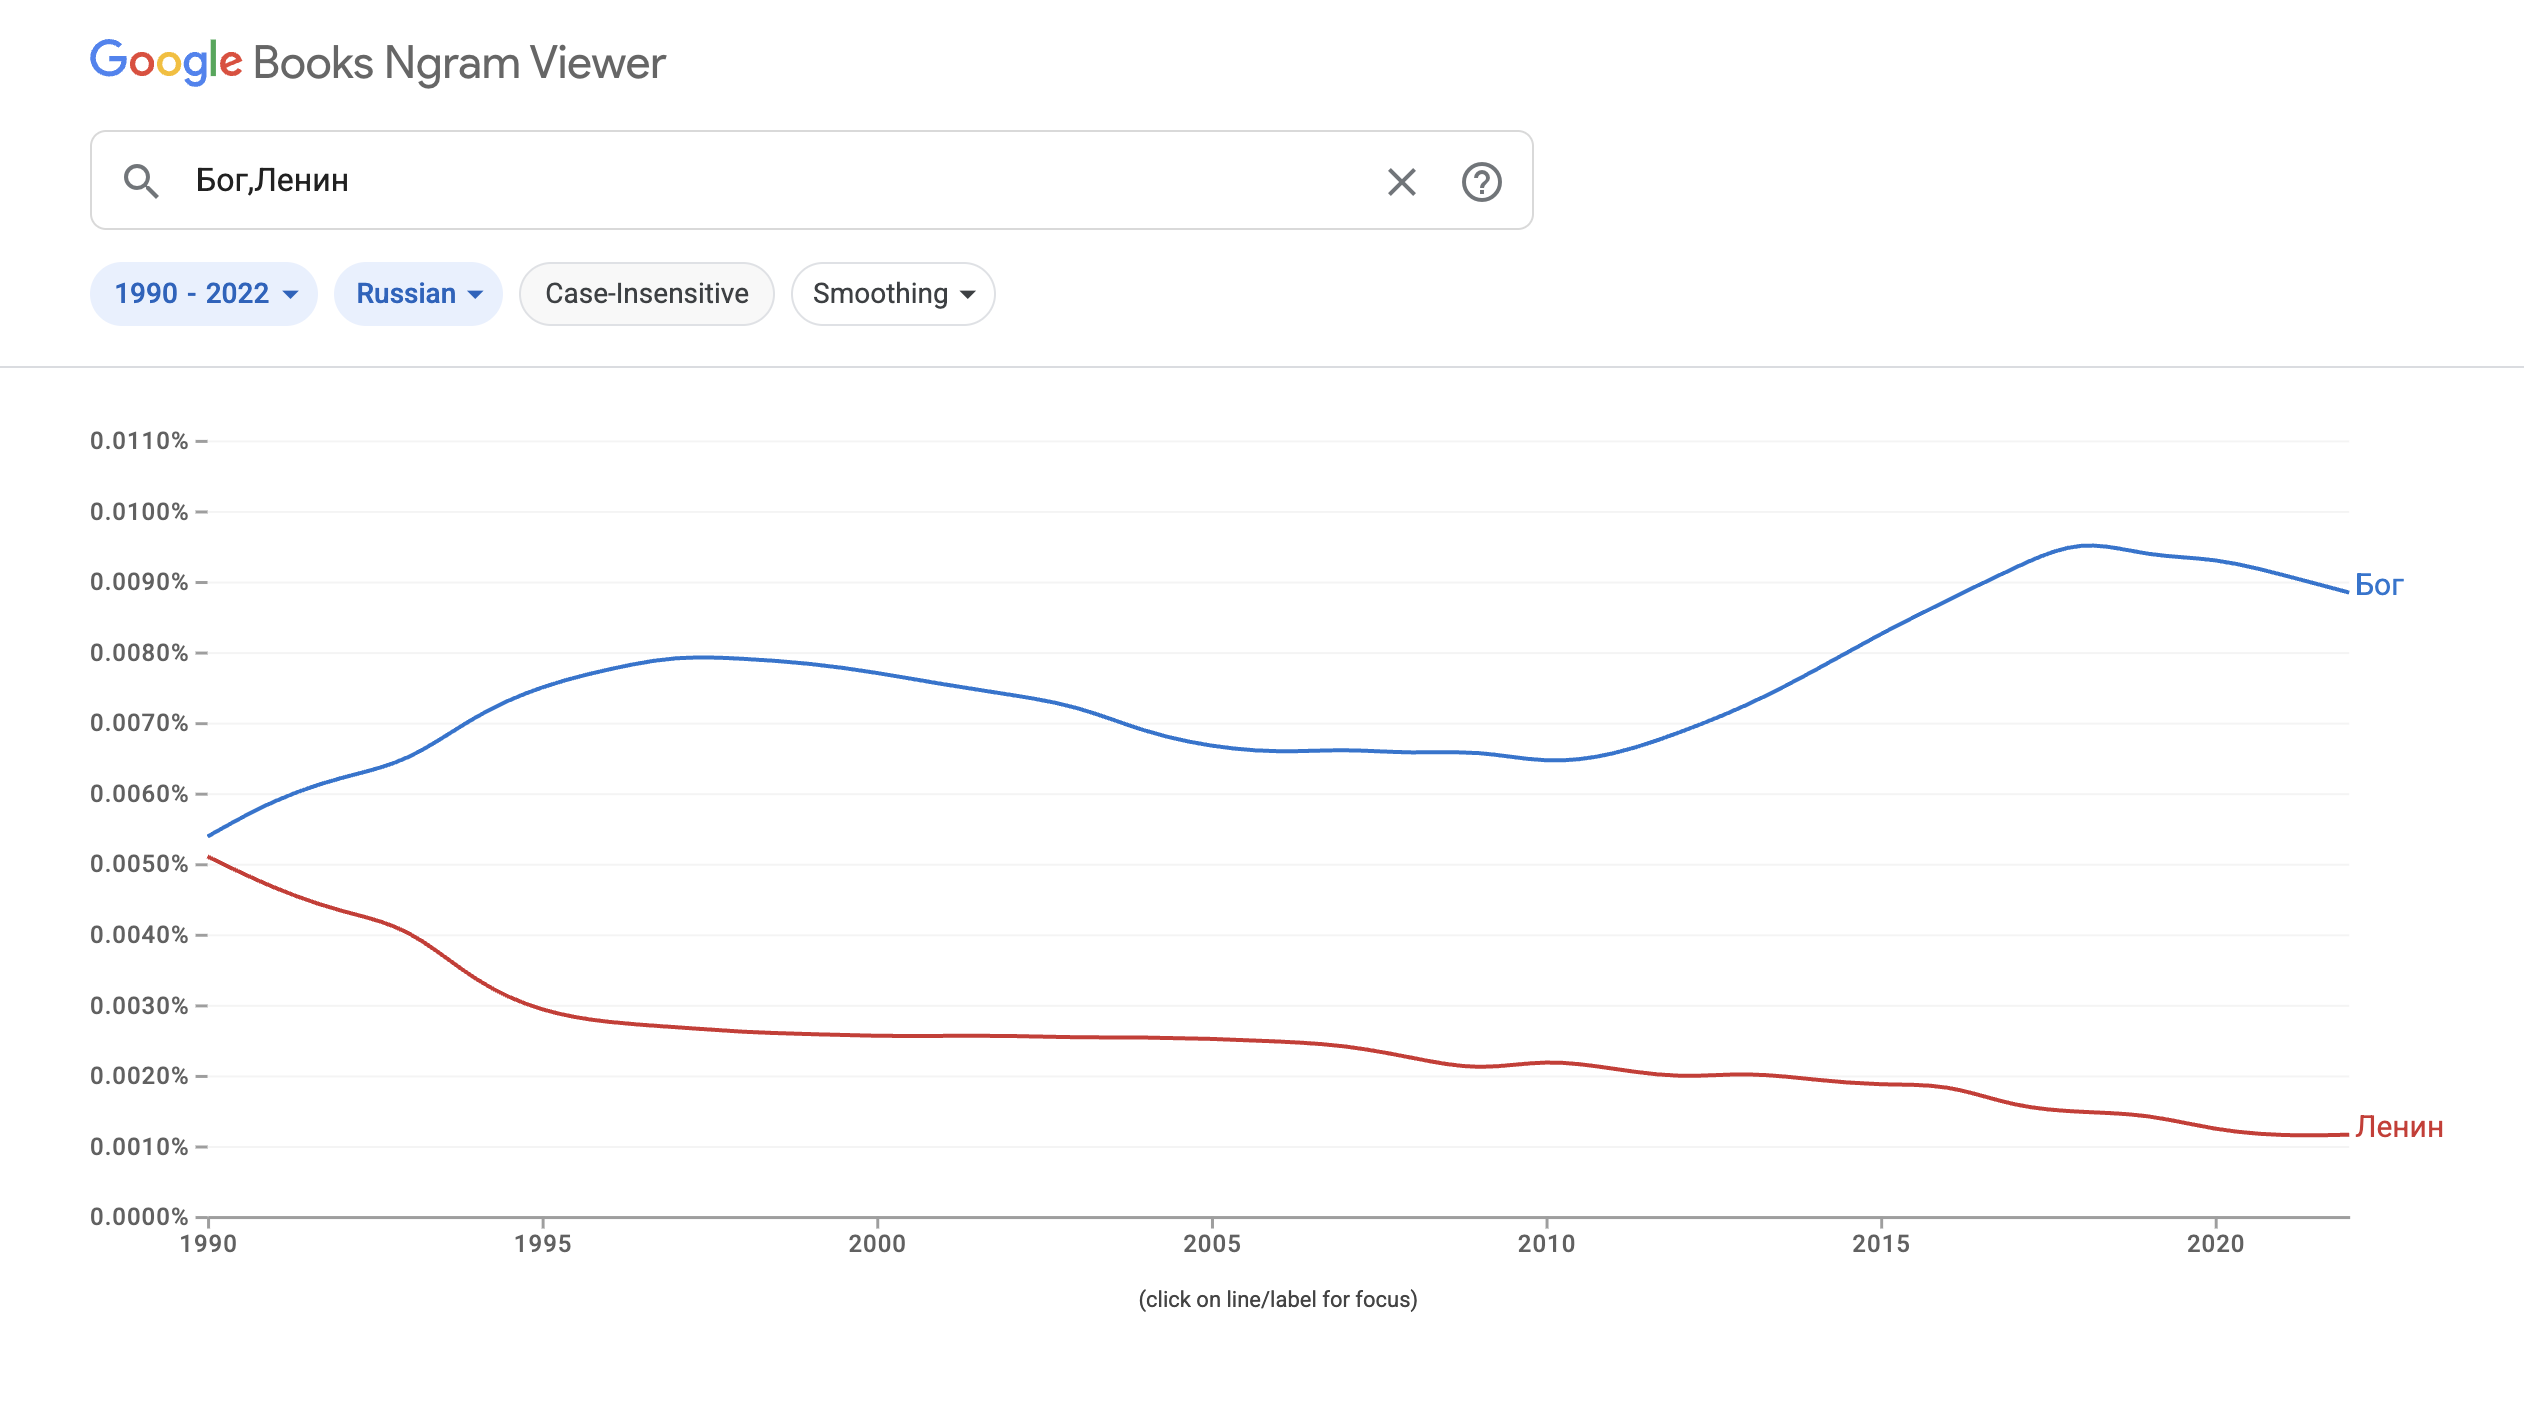

In [ ]:
# не уверена, что это подходящий ответ, но здесь хорошо видны культурно-исторические изменения
# (еще мне понравилась форма "рогатки" -- тренды с (почти) одного уровня пошли в разные стороны)

## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [ ]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [60]:
def collect_stats(corpus):
    unigrams = Counter()
    bigrams = Counter()
    
    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, 2))
    
    return unigrams, bigrams

unigrams, bigrams = collect_stats(tokenized_sentences)

def scorer_simple(word_count_a, word_count_b, bigram_count, min_count, *args):
    try:
        score = (bigram_count - min_count) / (word_count_a + word_count_b)
    except ZeroDivisionError:
        return 0
    return score

def score_bigrams(unigrams, bigrams, scorer, threshold=-100000, min_count=0):
    bigram2score = Counter()
    
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], 
                       bigrams[bigram], min_count)
        
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score

bigram2score = score_bigrams(unigrams, bigrams, scorer_simple, min_count=20)

In [61]:
# ИЗНАЧАЛЬНЫЙ SCORER

bigram2score.most_common(10)

[('риа новости', 0.4900746163592848),
 ('северном кавказе', 0.44553483807654565),
 ('associated press', 0.4345991561181435),
 ('new york', 0.4218009478672986),
 ('сих пор', 0.39092055485498106),
 ('взрывное устройство', 0.3665768194070081),
 ('таким образом', 0.36018957345971564),
 ('рао еэс', 0.33954451345755693),
 ('доменных имен', 0.31512605042016806),
 ('со ссылкой', 0.31079717457114026)]

In [62]:
corpus_length = 0
token_counts = Counter()
for sentence in tokenized_sentences:
    token_counts.update(sentence)
    corpus_length += len(sentence)

In [73]:
import numpy as np

In [74]:
def scorer_new(word_count_a, word_count_b, bigram_count, min_count, corpus_size):
    try:
        prob_a = word_count_a / corpus_size
        prob_b = word_count_b / corpus_size
        prob_bigram = (bigram_count - min_count) / corpus_size
        score =  np.log(prob_bigram / (prob_a * prob_b))
    except ZeroDivisionError:
        return 0
    return score

def score_bigrams_new(unigrams, bigrams, scorer, threshold=-100000, min_count=0, corpus_size=1):
    bigram2score = Counter()
    
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], 
                       bigrams[bigram], min_count, corpus_size)
        
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score

bigram2score_new = score_bigrams_new(unigrams, bigrams, scorer_new, min_count=20, corpus_size=corpus_length)

/var/folders/g4/48b_2yzn00lghxmjjqtyj4g00000gn/T/ipykernel_85362/217090424.py:6: RuntimeWarning: invalid value encountered in log
  score =  np.log(prob_bigram / (prob_a * prob_b))
/var/folders/g4/48b_2yzn00lghxmjjqtyj4g00000gn/T/ipykernel_85362/217090424.py:6: RuntimeWarning: divide by zero encountered in log
  score =  np.log(prob_bigram / (prob_a * prob_b))


In [75]:
# ОБНОВЛЕННЫЙ SCORER

bigram2score_new.most_common(10)

[('wall street', 9.742350607158828),
 ('саудовской аравии', 9.734137315262629),
 ('street journal', 9.614753950054121),
 ('dow jones', 9.596783671022962),
 ('подписных листов', 9.564470682032418),
 ('следственном изоляторе', 9.548450418263888),
 ('чрезвычайным ситуациям', 9.495855002980944),
 ('france presse', 9.48259524124157),
 ('персидском заливе', 9.478621775729541),
 ('полевые командиры', 9.47814089089219)]

In [ ]:
# результаты отличаются, потому что PMI чувствительна к частоте/редкости слов,
# а также вычисляется относительно независимого появления слов 

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов. 

In [76]:
def scorer_logs(word_count_a, word_count_b, bigram_count, min_count, corpus_size):
    try:
        prob_a = word_count_a / corpus_size
        prob_b = word_count_b / corpus_size
        prob_bigram = (bigram_count - min_count) / corpus_size
        score =  np.log(prob_bigram) - (np.log(prob_a) + np.log(prob_b))
    except ZeroDivisionError:
        return 0
    return score

In [77]:
bigram2score_logs = score_bigrams_new(unigrams, bigrams, scorer_logs, min_count=20, corpus_size=corpus_length)

/var/folders/g4/48b_2yzn00lghxmjjqtyj4g00000gn/T/ipykernel_85362/3074647437.py:6: RuntimeWarning: invalid value encountered in log
  score =  np.log(prob_bigram) - (np.log(prob_a) + np.log(prob_b))
/var/folders/g4/48b_2yzn00lghxmjjqtyj4g00000gn/T/ipykernel_85362/3074647437.py:6: RuntimeWarning: divide by zero encountered in log
  score =  np.log(prob_bigram) - (np.log(prob_a) + np.log(prob_b))


In [78]:
bigram2score_logs.most_common(10)

[('wall street', 9.742350607158832),
 ('саудовской аравии', 9.734137315262627),
 ('street journal', 9.614753950054121),
 ('dow jones', 9.596783671022964),
 ('подписных листов', 9.56447068203242),
 ('следственном изоляторе', 9.548450418263888),
 ('чрезвычайным ситуациям', 9.495855002980942),
 ('france presse', 9.482595241241569),
 ('персидском заливе', 9.478621775729543),
 ('полевые командиры', 9.47814089089219)]

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы

In [ ]:
# это не надо делать, если я всё верно поняла